In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [4]:
ds = pd.read_csv('./movies_prerelease.csv')

In [5]:
ds

,Movie,Target,Budget,BoxOffice,Rating,Votes,Year,"rat_(0, 2]","rat_(2, 4]","rat_(4, 6]",...,s_Zakir Hussain,s_Zareen Khan,s_Zarina Wahab,s_Zayed Khan,s_Zeenat Aman,s_Zenia Starr,s_Zenobia Shroff,s_Zohra Sehgal,s_Zoya Afroz,s_Zoya Hussain
0,Batti Gul Meter Chalu,2,50.0,37.00,6.3,1552,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dangal,6,90.0,370.00,8.5,105480,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manmarziyaan,3,30.0,26.00,7.0,1836,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sui Dhaaga: Made in India,5,50.0,79.00,6.9,1342,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Stree,6,25.0,127.00,8.3,7801,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Manto,2,8.0,3.50,7.9,622,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Pataakha,2,20.0,6.50,7.7,392,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3 Idiots,6,55.0,202.00,8.4,282358,2009,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,PK,6,85.0,340.00,8.2,127703,2014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Padman,5,40.0,81.00,8.1,10917,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data = ds.drop(columns=['Movie', 'BoxOffice', 'Rating', 'Votes', 'Year', 'rat_(0, 2]', 'rat_(2, 4]', 'rat_(4, 6]',  'rat_(6, 8]', 'rat_(8, 10]']).values

In [72]:
data.shape

(986, 1797)

In [8]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
## 70-30 Split randomized
split = int(0.7*data.shape[0])
np.random.shuffle(data)
X_train = data[:split, 1:]
Y_train = data[:split, 0]

X_test = data[split:, 1:]
Y_test = data[split:, 0]

print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(690, 1796) (690,)
(296, 1796) (296,)


0.28378378378378377


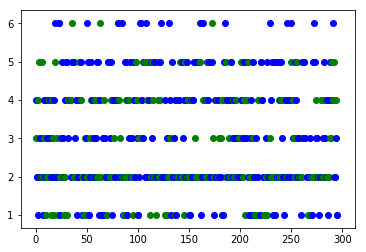

Normalized confusion matrix
[[0.29411765 0.55882353 0.         0.11764706 0.02941176 0.        ]
 [0.14583333 0.47916667 0.14583333 0.13541667 0.09375    0.        ]
 [0.08695652 0.45652174 0.13043478 0.2826087  0.04347826 0.        ]
 [0.10204082 0.3877551  0.14285714 0.2244898  0.12244898 0.02040816]
 [0.05660377 0.45283019 0.05660377 0.22641509 0.16981132 0.03773585]
 [0.         0.33333333 0.11111111 0.22222222 0.22222222 0.11111111]]


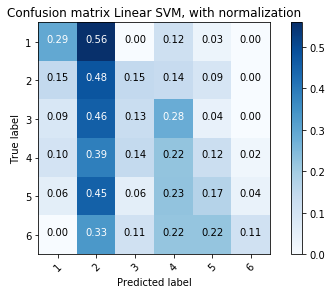

In [10]:
from sklearn.externals import joblib
svm_model_linear = svm.SVC(kernel = 'linear', C = 1).fit(X_train, Y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, Y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(Y_test, svm_predictions)

for ix in range(svm_predictions.shape[0]):
    plt.scatter(ix, svm_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Linear SVM, with normalization')

pickle.dump(svm_model_linear, open('full_svm.pkl', 'wb'))

0.23986486486486486


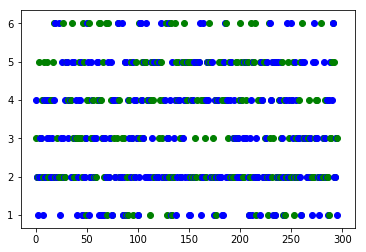

Normalized confusion matrix
[[0.17647059 0.32352941 0.11764706 0.11764706 0.14705882 0.11764706]
 [0.07291667 0.3125     0.13541667 0.1875     0.20833333 0.08333333]
 [0.06521739 0.2826087  0.26086957 0.17391304 0.19565217 0.02173913]
 [0.04081633 0.26530612 0.18367347 0.20408163 0.20408163 0.10204082]
 [0.05660377 0.28301887 0.18867925 0.18867925 0.20754717 0.0754717 ]
 [0.         0.38888889 0.16666667 0.22222222 0.11111111 0.11111111]]


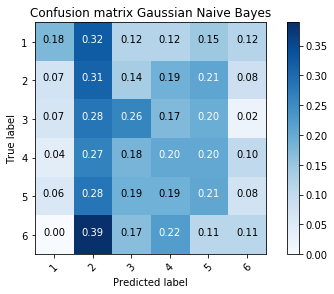

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy for X_test
accuracy = gnb.score(X_test, Y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(Y_test, gnb_predictions)

for ix in range(gnb_predictions.shape[0]):
    plt.scatter(ix, gnb_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Gaussian Naive Bayes')

pickle.dump(gnb, open('full_naivebayes.pkl', 'wb'))

0.25675675675675674


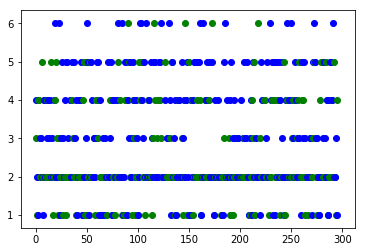

Normalized confusion matrix
[[0.41176471 0.35294118 0.02941176 0.14705882 0.05882353 0.        ]
 [0.17708333 0.51041667 0.0625     0.11458333 0.11458333 0.02083333]
 [0.19565217 0.54347826 0.06521739 0.13043478 0.06521739 0.        ]
 [0.10204082 0.59183673 0.08163265 0.16326531 0.04081633 0.02040816]
 [0.03773585 0.50943396 0.11320755 0.26415094 0.03773585 0.03773585]
 [0.11111111 0.38888889 0.11111111 0.22222222 0.16666667 0.        ]]


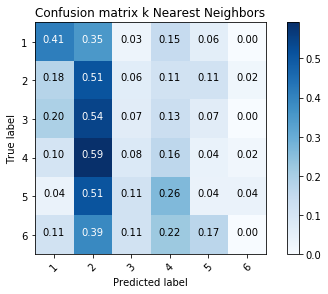

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(Y_test, knn_predictions)

for ix in range(knn_predictions.shape[0]):
    plt.scatter(ix, knn_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix k Nearest Neighbors')

pickle.dump(knn, open('full_knn.pkl', 'wb'))

0.28040540540540543


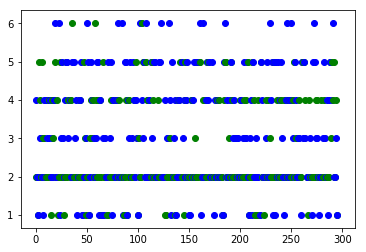

Normalized confusion matrix
[[0.26470588 0.61764706 0.02941176 0.02941176 0.05882353 0.        ]
 [0.10416667 0.52083333 0.0625     0.20833333 0.09375    0.01041667]
 [0.04347826 0.52173913 0.04347826 0.30434783 0.08695652 0.        ]
 [0.06122449 0.53061224 0.08163265 0.24489796 0.06122449 0.02040816]
 [0.01886792 0.60377358 0.01886792 0.1509434  0.18867925 0.01886792]
 [0.         0.61111111 0.05555556 0.11111111 0.22222222 0.        ]]


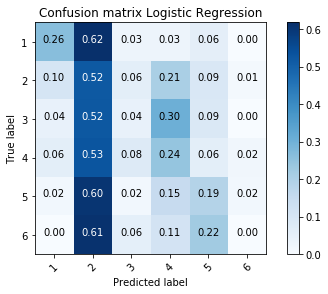

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = lr.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
lr_predictions = lr.predict(X_test) 
cm = confusion_matrix(Y_test, lr_predictions)

for ix in range(lr_predictions.shape[0]):
    plt.scatter(ix, lr_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Logistic Regression')

pickle.dump(lr, open('full_logreg.pkl', 'wb'))

0.2905405405405405


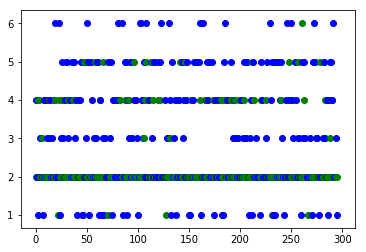

Normalized confusion matrix
[[0.02941176 0.91176471 0.         0.02941176 0.02941176 0.        ]
 [0.03125    0.76041667 0.01041667 0.14583333 0.05208333 0.        ]
 [0.         0.7826087  0.         0.13043478 0.08695652 0.        ]
 [0.         0.73469388 0.02040816 0.20408163 0.04081633 0.        ]
 [0.03773585 0.66037736 0.03773585 0.20754717 0.03773585 0.01886792]
 [0.         0.72222222 0.         0.22222222 0.05555556 0.        ]]


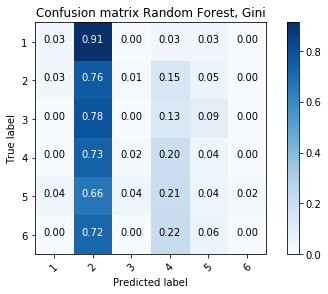

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Random Forest, Gini')

pickle.dump(rf, open('full_randfor.pkl', 'wb'))

0.2972972972972973


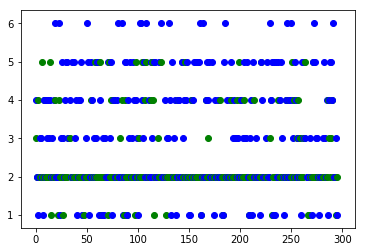

Normalized confusion matrix
[[0.14705882 0.79411765 0.         0.05882353 0.         0.        ]
 [0.08333333 0.72916667 0.05208333 0.08333333 0.05208333 0.        ]
 [0.04347826 0.86956522 0.02173913 0.02173913 0.04347826 0.        ]
 [0.         0.65306122 0.08163265 0.16326531 0.10204082 0.        ]
 [0.05660377 0.69811321 0.03773585 0.13207547 0.0754717  0.        ]
 [0.         0.66666667 0.05555556 0.16666667 0.11111111 0.        ]]


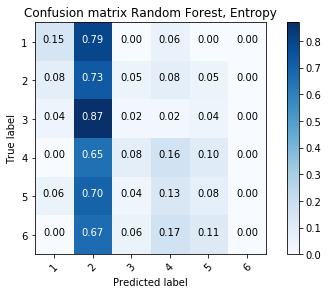

In [19]:
rf = RandomForestClassifier(n_estimators=20, criterion='entropy', warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Random Forest, Entropy')

pickle.dump(rf, open('full_randfor2.pkl', 'wb'))

In [20]:
from sklearn.linear_model import LinearRegression

In [42]:
data2 = ds[['BoxOffice','Target','Budget','Year']]
#data = ds.drop(columns=['Movie', 'BoxOffice', 'Rating', 'Votes', 'Year']).values
print(data2.shape)
data2 = data2.values

for x in range(data2.shape[0]):
    data2[x][0] = data2[x][0] + 26

(986, 4)


In [53]:
## 70-30 Split randomized
split = int(0.7*data2.shape[0])
np.random.shuffle(data2)
X_train2 = data2[:split, 1:]
Y_train2 = data2[:split, 0]

X_test2 = data2[split:, 1:]
Y_test2 = data2[split:, 0]

print (X_train2.shape, Y_train2.shape)
print (X_test2.shape, Y_test2.shape)

(690, 3) (690,)
(296, 3) (296,)


In [54]:
lm = LinearRegression()
lm.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
lm.score(X_test2, Y_test2)

0.8033245735221762

In [56]:
y_pred2 = lm.predict(X_test2)
print(y_pred2.shape)
for i in range(y_pred2.shape[0]):
    print(y_pred2[i], Y_test2[i])

(296,)
57.71276464696052 50.0
97.24089012955267 78.0
95.2976357634659 73.0
101.67348238192153 107.0
77.16159341002913 65.0
72.62429426684776 73.0
76.89497163719227 70.0
18.5329666262204 31.0
63.84648719038296 51.0
76.53530069682517 60.0
143.17503166766176 115.0
21.728806418715067 30.0
32.65628865087956 39.0
42.51610154045784 46.0
16.942214965236758 31.0
18.275009584653503 33.0
39.41480741149951 33.0
59.92980902114789 52.0
63.47247977948848 54.9
10.080485809810284 27.5
112.88042636144405 134.0
61.80002242948956 50.0
43.67831654658028 38.0
76.98384556147118 66.0
56.54338140557422 47.0
29.3787431693695 33.0
84.28127960702238 71.0
24.835772286930705 29.0
18.275009584653503 31.0
16.22137658849647 29.0
66.94628482333496 53.0
71.55662492426165 53.5
11.596700017042508 27.0
48.1195735302191 45.0
33.46600095189865 34.0
46.87415633907506 42.0
14.26945749113952 28.0
40.65305636737992 34.0
67.02799051235013 49.0
51.03595157535574 46.2
24.040396456438884 29.0
81.68873132593421 71.0
72.9926299384847 

In [57]:
pickle.dump(lm, open('full_lm.pkl', 'wb'))

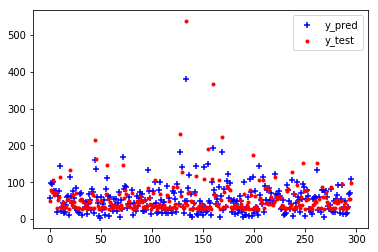

In [58]:
y = range(y_pred.shape[0])
plt.scatter(y, y_pred2, c='b', marker='+')
plt.scatter(y, Y_test2, c='r', marker='.')
labels = ['y_pred', 'y_test']
plt.legend(labels)

In [65]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [83]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(Y_train.shape, y_train.shape)

(690,) (690, 7)


In [84]:
model = Sequential()
model.add(Dense(800, input_shape=(1796,)))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 800)               1437600   
_________________________________________________________________
activation_17 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               160200    
_________________________________________________________________
activation_18 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                10050     
_________________________________________________________________
activation_19 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 357       
__________

In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=[X_test, y_test])

Train on 690 samples, validate on 296 samples
Epoch 1/50
690/690 [==============================] - 7s 10ms/step - loss: 1.9040 - acc: 0.2652 - val_loss: 1.7572 - val_acc: 0.3311
Epoch 2/50
690/690 [==============================] - 4s 5ms/step - loss: 1.6124 - acc: 0.3362 - val_loss: 1.7422 - val_acc: 0.3041
Epoch 3/50
690/690 [==============================] - 3s 5ms/step - loss: 1.2681 - acc: 0.5377 - val_loss: 1.7931 - val_acc: 0.3547
Epoch 4/50
690/690 [==============================] - 3s 5ms/step - loss: 0.8620 - acc: 0.7087 - val_loss: 2.0086 - val_acc: 0.2736
Epoch 5/50
690/690 [==============================] - 3s 5ms/step - loss: 0.5477 - acc: 0.8377 - val_loss: 2.4981 - val_acc: 0.2736
Epoch 6/50
690/690 [==============================] - 3s 5ms/step - loss: 0.3632 - acc: 0.8928 - val_loss: 2.7191 - val_acc: 0.2365
Epoch 7/50
690/690 [==============================] - 3s 5ms/step - loss: 0.2139 - acc: 0.9304 - val_loss: 3.2339 - val_acc: 0.2534
Epoch 8/50
690/690 [=========

In [25]:
final_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote,  year, df_rating, df_genre, df_year, df_runtime, df_dir, df_star], axis=1)

In [29]:
final_df.to_csv('movies_prerelease_full.csv', encoding='utf-8', index=False)

In [31]:
year_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote,  year, df_year], axis=1)
year_df.to_csv('movies_prerelease_year.csv', encoding='utf-8', index=False)

In [34]:
genre_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, df_genre], axis=1)
genre_df.to_csv('movies_prerelease_genre.csv', encoding='utf-8', index=False)

In [35]:
yeargenre_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, year, df_year, df_genre], axis=1)
yeargenre_df.to_csv('movies_prerelease_yeargenre.csv', encoding='utf-8', index=False)

In [36]:
final2_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, df_dir, df_star], axis=1)
final2_df.to_csv('movies_prerelease_fullcast.csv', encoding='utf-8', index=False)